In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import control as ct
import lmfit
from pytz import timezone
import vaex
import pvlib

import sys
sys.path.append('../../../')

from utils.plot import config_matplotlib, figsize, fig_save_and_show  # noqa: E402

config_matplotlib()
latex_img_path = '/home/joaoantoniocardoso/workspace_TCC/repo/tcc/imgs/'

# Data

'original columns:'

Index(['Battery Pack Voltage', 'Pilot Duty Cycle', 'Pilot Motor On',
       'Pilot Boat On', 'ESC Duty Cycle', 'Motor Angular Speed',
       'MPPT 1 Input Voltage', 'MPPT 2 Input Voltage', 'MPPT 3 Input Voltage',
       'MPPT 4 Input Voltage', 'MPPT 1 Output Voltage',
       'MPPT 2 Output Voltage', 'MPPT 3 Output Voltage',
       'MPPT 4 Output Voltage', 'MPPT 1 Input Current', 'MPPT 2 Input Current',
       'MPPT 3 Input Current', 'MPPT 4 Input Current', 'MPPT 1 Duty Cycle',
       'MPPT 2 Duty Cycle', 'MPPT 3 Duty Cycle', 'MPPT 4 Duty Cycle',
       'MPPT 1 Input Power', 'MPPT 2 Input Power', 'MPPT 3 Input Power',
       'MPPT 4 Input Power', 'MPPTs Input Power', 'MPPT 1 Output Current',
       'MPPT 2 Output Current', 'MPPT 3 Output Current',
       'MPPT 4 Output Current', 'MPPTs Output Current', 'MPPT 1 Output Power',
       'MPPT 2 Output Power', 'MPPT 3 Output Power', 'MPPT 4 Output Power',
       'MPPTs Output Power', 'Battery Current', 'Battery Power',
       'ESC Input Curre

'renamed columns:'

{'Battery Pack Voltage': 'batt_v',
 'Battery Current': 'batt_i',
 'ESC Duty Cycle': 'esc_d',
 'Motor Angular Speed': 'motor_w',
 'ESC Input Power': 'esc_p_in',
 'ESC Input Current': 'esc_i_in',
 'MPPT 1 Input Current': 'mppt1_ii',
 'MPPT 2 Input Current': 'mppt2_ii',
 'MPPT 3 Input Current': 'mppt3_ii',
 'MPPT 4 Input Current': 'mppt4_ii',
 'MPPT 1 Input Voltage': 'mppt1_vi',
 'MPPT 2 Input Voltage': 'mppt2_vi',
 'MPPT 3 Input Voltage': 'mppt3_vi',
 'MPPT 4 Input Voltage': 'mppt4_vi',
 'MPPT 1 Duty Cycle': 'mppt1_d',
 'MPPT 2 Duty Cycle': 'mppt2_d',
 'MPPT 3 Duty Cycle': 'mppt3_d',
 'MPPT 4 Duty Cycle': 'mppt4_d',
 'MPPT 1 Output Current': 'mppt1_io',
 'MPPT 2 Output Current': 'mppt2_io',
 'MPPT 3 Output Current': 'mppt3_io',
 'MPPT 4 Output Current': 'mppt4_io',
 'Solar POA': 'solar_poa',
 'Wind Speed': 'wind_v',
 'Air Temperature': 'air_t'}

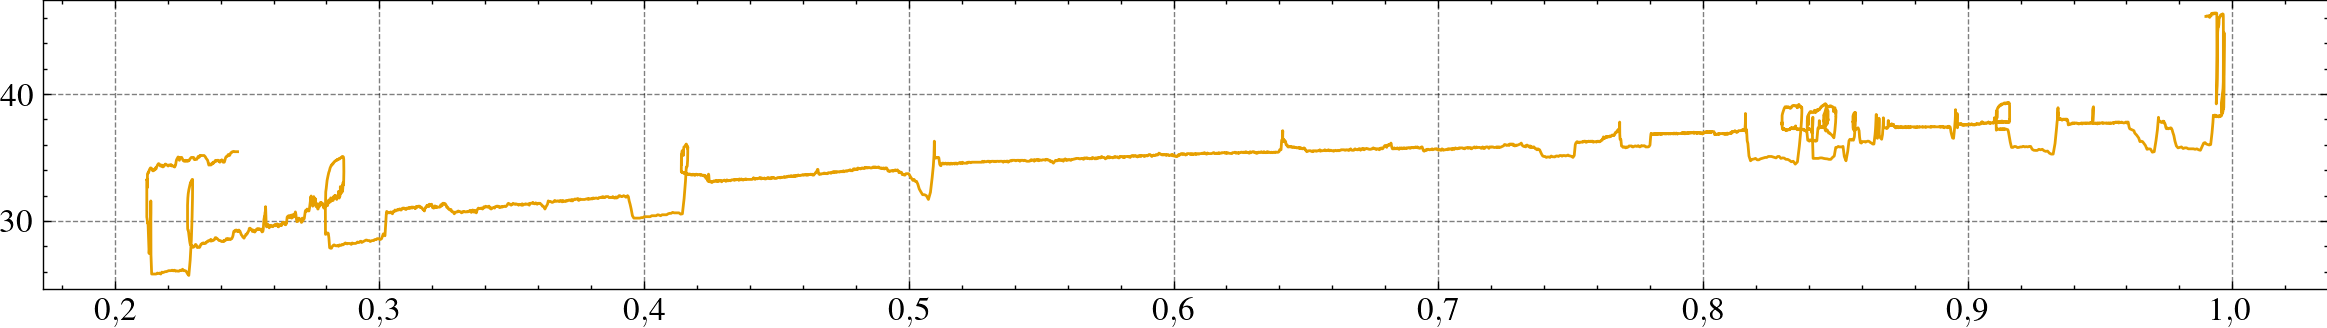

/tmp/ipykernel_470135/2901823577.py:127: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


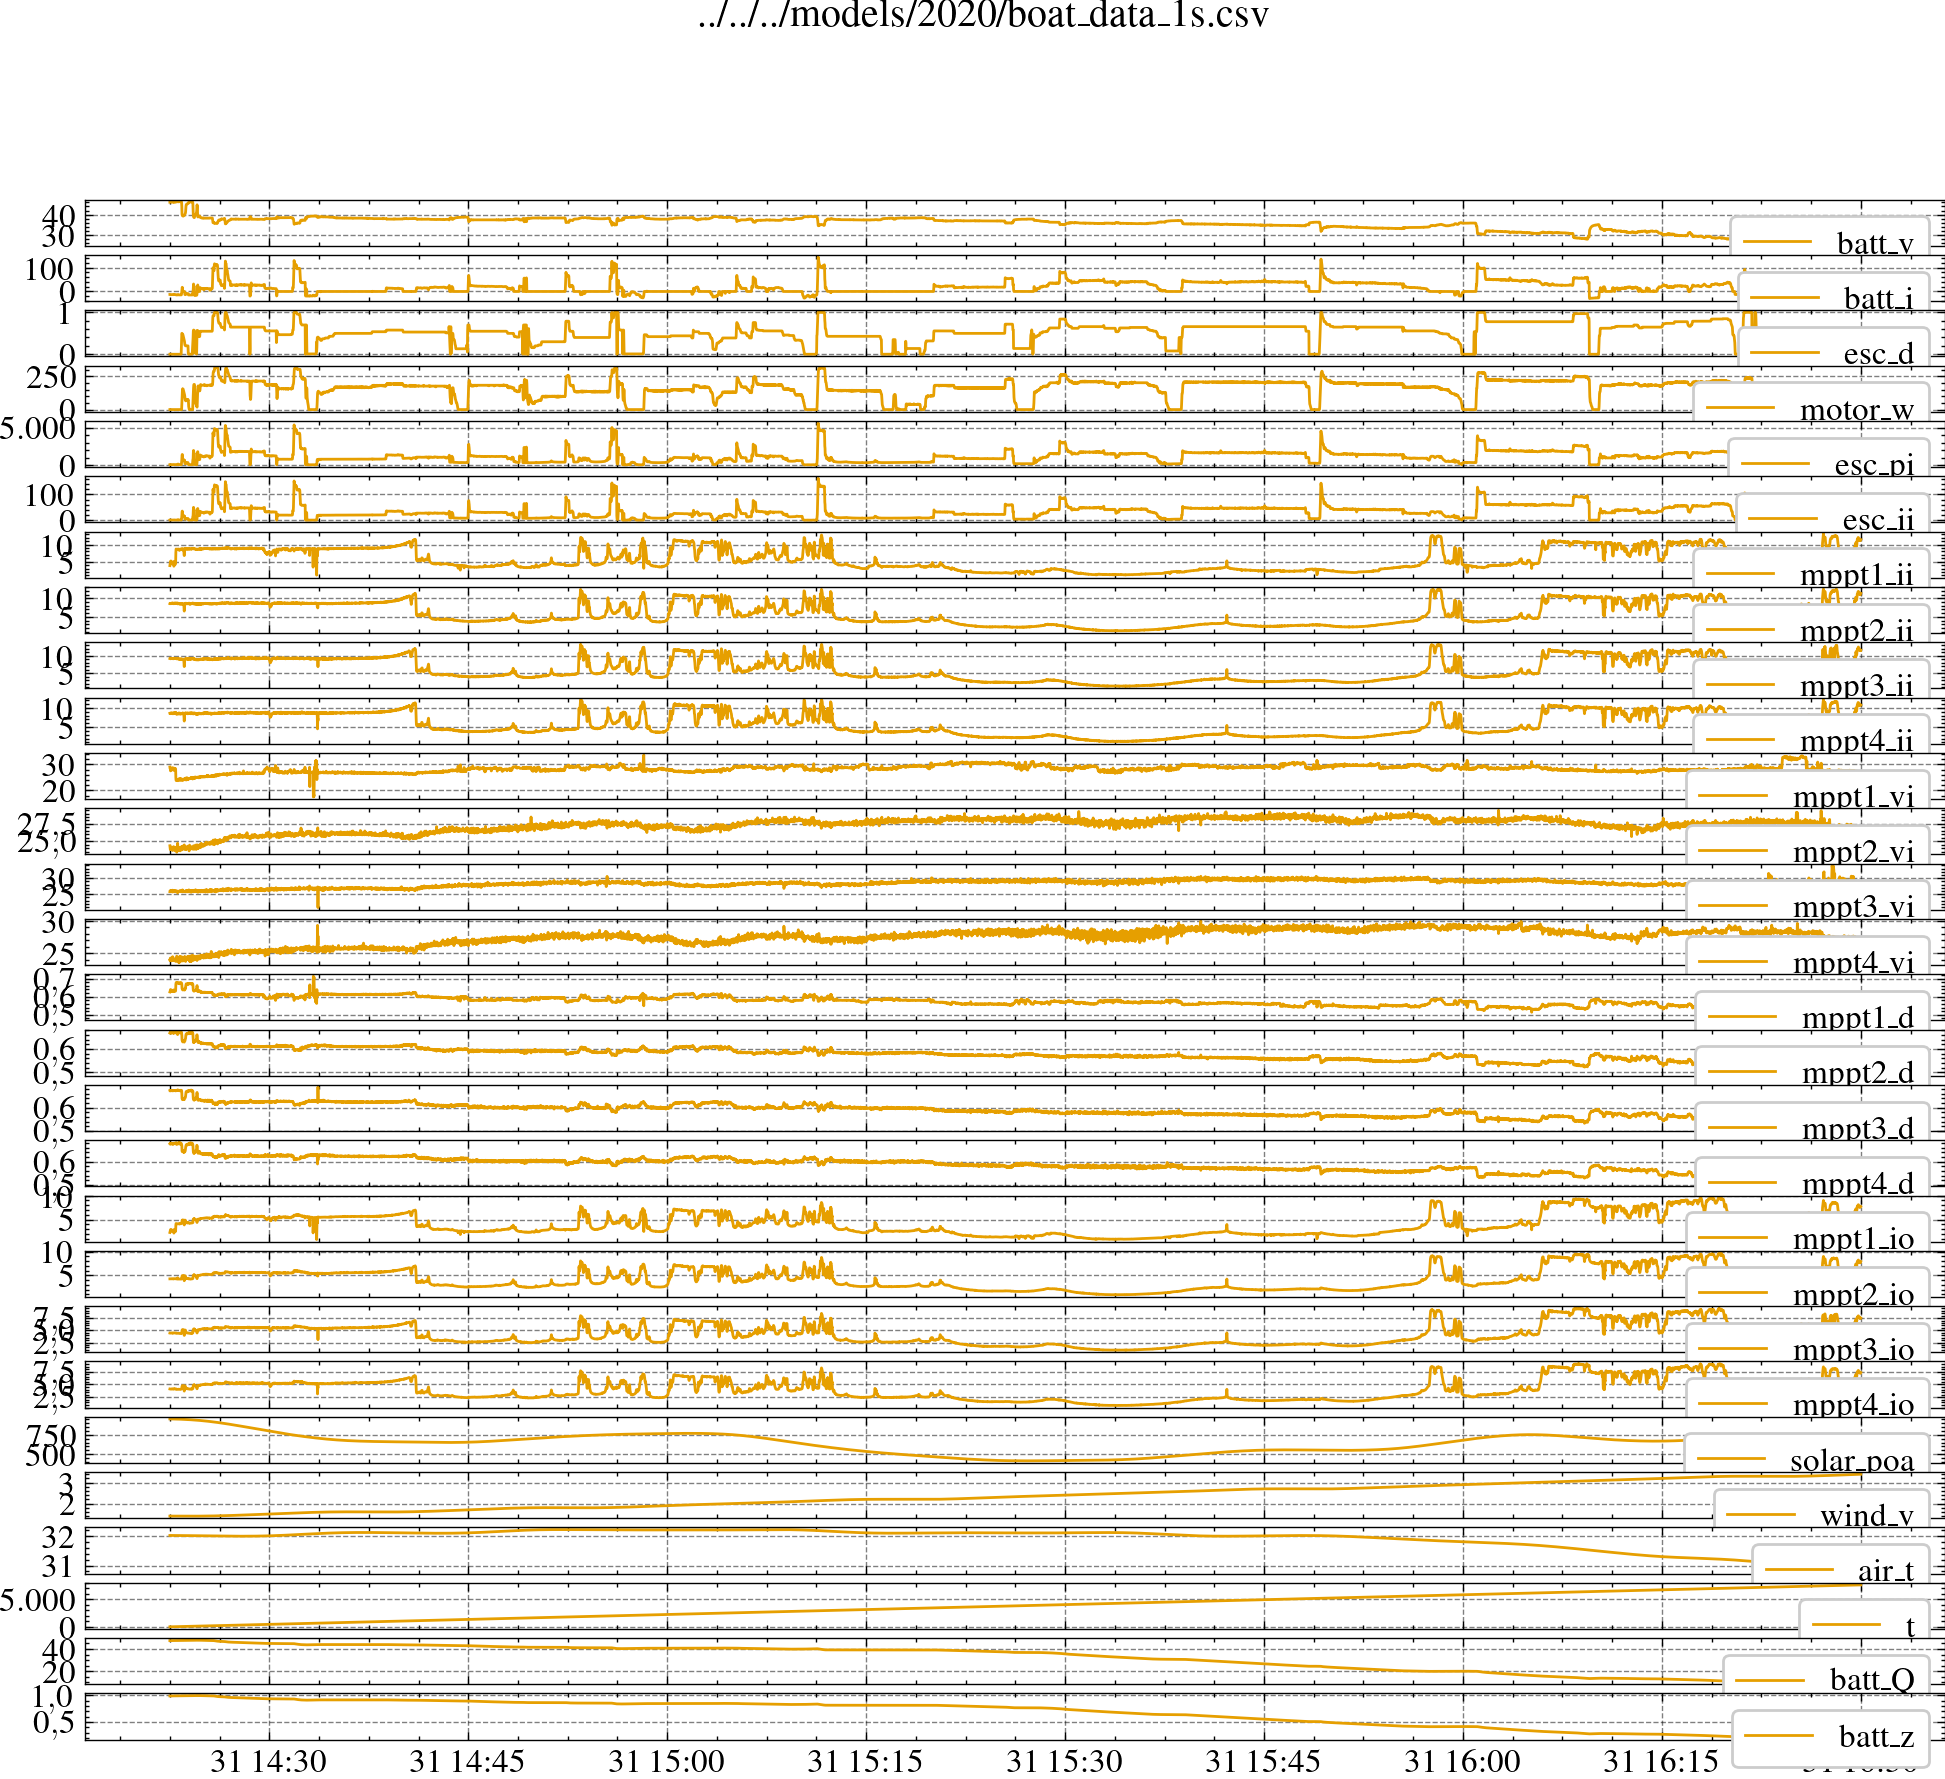

,batt_v,batt_i,esc_d,motor_w,esc_p_in,esc_i_in,mppt1_ii,mppt2_ii,mppt3_ii,mppt4_ii,...,mppt1_io,mppt2_io,mppt3_io,mppt4_io,solar_poa,wind_v,air_t,t,batt_Q,batt_z
count,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,...,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000,7651.000000
mean,35.764849,16.791428,0.501461,150.233090,1077.200407,31.172290,5.543170,5.731278,6.017759,5.658891,...,3.997794,4.146185,4.141591,3.943962,641.249844,2.364398,31.906287,3825.000000,31.391252,0.653984
std,2.998944,24.502890,0.238343,75.666041,792.240442,24.078594,3.200875,3.034572,3.189933,2.945680,...,2.240515,2.180902,2.155720,2.054275,125.612859,0.596928,0.358083,2208.797788,12.143840,0.252997
min,25.710004,-31.234375,0.000000,0.000000,13.721909,0.393661,0.932787,1.170180,1.267107,1.199030,...,0.822854,0.889678,0.940646,0.900803,415.423612,1.396792,30.800000,0.000000,10.181864,0.212122
25%,34.179625,0.000000,0.399902,130.376100,382.963688,10.448546,2.874602,3.174219,3.337401,3.141844,...,2.225441,2.465245,2.497963,2.371262,550.641260,1.802443,31.833877,1912.500000,19.963872,0.415914
50%,36.664047,13.676682,0.548828,175.929200,1002.553678,27.743007,4.334492,4.576081,4.814583,4.553214,...,3.261844,3.458587,3.467175,3.290902,669.184103,2.327496,32.064629,3825.000000,36.889866,0.768539
75%,37.868615,34.621357,0.658691,201.061940,1583.069056,45.870186,8.778081,8.681768,9.172183,8.687173,...,5.636995,5.584598,5.567157,5.299344,725.989237,2.864716,32.110208,5737.500000,41.167359,0.857653
max,46.375878,144.744320,1.000000,314.159270,5604.662721,161.720701,13.216764,12.589989,13.267708,12.214033,...,9.600894,9.715507,9.520137,9.078954,953.534344,3.400000,32.210613,7650.000000,47.850804,0.996892


nans:  0


,batt_v,batt_i,esc_d,motor_w,esc_p_in,esc_i_in,mppt1_ii,mppt2_ii,mppt3_ii,mppt4_ii,...,mppt1_io,mppt2_io,mppt3_io,mppt4_io,solar_poa,wind_v,air_t,t,batt_Q,batt_z
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-31 14:22:30,46.112379,-12.441707,0.000000,0.0,57.741190,1.252184,3.846669,8.579481,9.181898,8.641238,...,2.294017,4.257307,4.438891,4.126829,953.534344,1.400000,32.012535,0.0,47.520000,0.990000
2020-01-31 14:22:31,46.112379,-12.379807,0.000000,0.0,68.996632,1.496271,4.279089,8.556892,9.171729,8.658903,...,2.502784,4.256402,4.427215,4.112832,953.477416,1.399944,32.012507,1.0,47.523447,0.990072
2020-01-31 14:22:32,46.112379,-12.891741,0.000000,0.0,51.911750,1.125766,4.501150,8.677278,9.193341,8.513084,...,2.643451,4.249418,4.449001,4.098790,953.419432,1.399889,32.012477,2.0,47.526957,0.990145
2020-01-31 14:22:33,46.112379,-13.238582,0.000000,0.0,47.774602,1.036047,5.137879,8.643457,9.123890,8.619635,...,2.892808,4.261543,4.445623,4.097809,953.360387,1.399833,32.012446,3.0,47.530587,0.990221
2020-01-31 14:22:34,46.150022,-13.183948,0.000000,0.0,51.393290,1.113614,5.139106,8.676945,9.215208,8.709634,...,2.899093,4.257631,4.446175,4.116656,953.300276,1.399778,32.012415,4.0,47.534256,0.990297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-31 16:29:56,35.459478,-27.599330,0.239258,0.0,18.159421,0.512118,11.225876,11.112033,11.446639,10.697582,...,7.592204,7.632358,7.478791,7.258799,639.950005,3.398440,30.801798,7646.0,11.797233,0.245776
2020-01-31 16:29:57,35.459478,-27.582933,0.239258,0.0,20.922997,0.590054,11.232184,11.067114,11.537382,10.705607,...,7.647018,7.672334,7.461390,7.242949,639.630020,3.398831,30.801345,7647.0,11.804897,0.245935
2020-01-31 16:29:58,35.459478,-27.481535,0.239258,0.0,18.699407,0.527346,11.188024,11.023394,11.483135,10.672905,...,7.636629,7.652318,7.391231,7.179405,639.310331,3.399221,30.800894,7648.0,11.812545,0.246095


In [3]:
def compute_df_soc(df, nominal_Q, inplace=False):
    """
    Compute the State of Charge (SOC) of a battery.

    Parameters:
        df (pd.DataFrame): DataFrame containing battery data.
        nominal_Q (float): Nominal capacity of the battery in Ampere-hours (Ah).
        inplace (bool, optional): If True, the SOC values are added to the input DataFrame `df`.
                                  Default is False.

    Returns:
        np.ndarray: Array containing the computed SOC values as a fraction of the nominal capacity.

    Notes:
        - The input DataFrame `df` is expected to contain a column named 'batt_Q' representing the battery charge.
        - The output SOC values are dimensionless fractions representing the battery's charge level relative to its nominal capacity.
        - If `inplace` is True, the computed SOC values are added as a new column 'batt_z' to the input DataFrame `df`.
    """
    SOC = df['batt_Q'].to_numpy() / nominal_Q

    if inplace:
        df['batt_z'] = SOC
    return SOC

def compute_df_capacity(df, nominal_Q, initial_SOC, inplace=False):
    """
    Compute the capacity of a battery based on cumulative integration of current over time.

    Parameters:
        df (pd.DataFrame): DataFrame containing battery data.
        nominal_Q (float): Nominal capacity of the battery in Ampere-hours (Ah).
        initial_SOC (float): Initial State of Charge (SOC) as a fraction of the nominal capacity.
        inplace (bool, optional): If True, the computed capacity values are added to the input DataFrame `df`.
                                  Default is False.

    Returns:
        np.ndarray: Array containing the computed capacity values in Ampere-hours (Ah).

    Notes:
        - The input DataFrame `df` is expected to contain columns 'batt_i' for battery current and 't' for time.
        - The output capacity values represent the remaining battery capacity after cumulative integration of current over time.
        - The input parameter `initial_SOC` is a dimensionless fraction representing the initial battery charge relative to its nominal capacity.
        - If `inplace` is True, the computed capacity values are added as a new column 'batt_Q' to the input DataFrame `df`.
    """
    from scipy.integrate import cumulative_trapezoid as cumtrapz

    time_hours = df['t'] / 3600.0  # Converts time in seconds to time in hours
    Q = (nominal_Q * initial_SOC) - cumtrapz(df['batt_i'], time_hours, initial=0)  # units: Amper-hour

    if inplace:
        df['batt_Q'] = Q
    return Q

def load_df(filename, start, end, nominal_Q, initial_SOC, resample_rule='1s', rename_columns={}):
    df = vaex.from_csv(filename).to_pandas_df()
    df["timestamp"] = pd.DatetimeIndex(df["timestamp"]).tz_convert(None)
    df = df.set_index("timestamp", drop=True)

    display('original columns:', df.columns)
    display('renamed columns:', rename_columns)

    df = df.loc[
        (df.index >= start) & (df.index <= end),
        rename_columns.keys(),
    ].rename(columns=rename_columns).dropna().resample(resample_rule).mean().interpolate(method='time', limit_area='inside')

    # After resampling, create the equally-spaced 't' index, used for control simulations
    df['t'] = df.index.to_numpy(dtype='timedelta64[s]').astype(float) * 1e-9  # t is now a float in seconds
    df['t'] -= df['t'].iloc[0]

    compute_df_capacity(df, nominal_Q, initial_SOC, inplace=True)
    compute_df_soc(df, nominal_Q, inplace=True)

    return df

cell_amps_hour = 48
series_cells = 3
parallel_cells = 1
cell_voltage = 12
nominal_Q = parallel_cells * cell_amps_hour  # Capacity, in Amper-hour
initial_SOC = 0.99
nominal_E = series_cells * parallel_cells * cell_amps_hour * cell_voltage

# From Revezamento
tzinfo = timezone("America/Sao_Paulo")

start = pd.Timestamp(
    year=2020, month=1, day=31, hour=11, minute=22, second=30, tzinfo=tzinfo
).tz_convert(None)
end = pd.Timestamp(
    year=2020, month=1, day=31, hour=13, minute=30, second=0, tzinfo=tzinfo
).tz_convert(None)

filename = "../../../models/2020/boat_data_1s.csv"
rename_columns = {
    'Battery Pack Voltage': 'batt_v',
    'Battery Current': 'batt_i',
    'ESC Duty Cycle': 'esc_d',
    'Motor Angular Speed': 'motor_w',
    'ESC Input Power': 'esc_p_in',
    'ESC Input Current': 'esc_i_in',
    **{f'MPPT {i} Input Current': f'mppt{i}_i_in' for i in range(1,5)},
    **{f'MPPT {i} Input Voltage': f'mppt{i}_v_in' for i in range(1,5)},
    **{f'MPPT {i} Duty Cycle': f'mppt{i}_d' for i in range(1,5)},
    **{f'MPPT {i} Output Current': f'mppt{i}_i_out' for i in range(1,5)},
    'Solar POA': 'solar_poa',
    'Wind Speed': 'wind_v',
    'Air Temperature': 'air_t',
}
df = load_df(filename, start, end, resample_rule='1s', rename_columns=rename_columns, nominal_Q=nominal_Q, initial_SOC=initial_SOC)

df = df.dropna()
df = df.resample('1s').mean().interpolate(method="time", limit_area='inside')
dfa = df.copy(deep=True)

plt.figure(figsize=(12, 2))
plt.plot(df['batt_z'], df['batt_v'])
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(len(df.columns), figsize=(12,10))
for k, col in enumerate(df.columns):
    ax[k].plot(df.index, df[col], label=col)
    ax[k].legend(loc=1)

plt.suptitle(filename)
plt.tight_layout()
plt.show()

display(df.describe())

# Check for nans in the data
print('nans: ', df.isna().sum().sum())

df

In [4]:
batt_name = 'D35'
cell_amps_hour = 48
series_cells = 3
parallel_cells = 1
cell_voltage = 12
nominal_Q = parallel_cells * cell_amps_hour  # Capacity, in Amper-hour
initial_SOC = 0.99
nominal_E = series_cells * parallel_cells * cell_amps_hour * cell_voltage

# Battery Equivalent Circuit Model


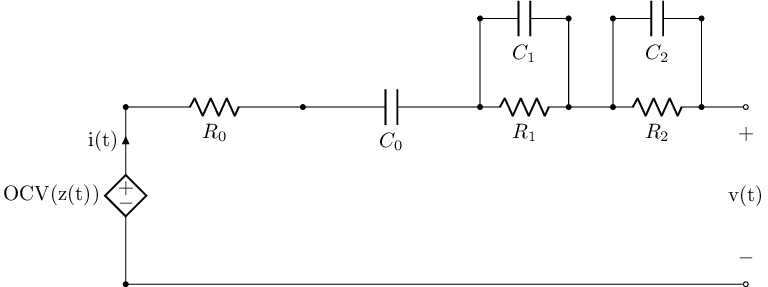

In [55]:
# !pip install lcapy zfitpy pyspice
# %pip install https://github.com/mph-/lcapy/archive/master.zip
# Open `tllocalmgr`, then `install circuitikz`, then `exit`, then `sudo texhash`
import lcapy as lca

circuit_draw_params = dict(
    # help_lines=1,
    # debug=True,
    draw_nodes=True,
    label_nodes=False,
    label_ids=True,
    label_values=False,
    cpt_size=1,
    node_spacing=3,
    scale=1,
    dpi=150,
)

circuit = lca.Circuit("""
E1 R0.1 0 2 0; down, l={OCV(z(t))}, i>={i(t)}
R0 .1 .2; right
C0 R0.2 R1.1 0; right
R1 .1 .2; right=0.5
C1 .1 .2; right=0.5
W R1.1 C1.1; up=0.5
W R1.2 C1.2; up=0.5
W R1.2 R2.1; right=0.25
R2 .1 .2; right=0.5
C2 .1 .2; right=0.5
W R2.1 C2.1; up=0.5
W R2.2 C2.2; up=0.5
W R2.2 P1.1; right=0.25
P1 .1 0_2; down, v={v(t)}
W 0 0_2; right
;""")
circuit.draw(**circuit_draw_params)
circuit.draw(**circuit_draw_params, filename="/home/joaoantoniocardoso/workspace_TCC/repo/tcc/imgs/battery_model_pnvg.png")


![](feZkCLr.png)

De acordo com [Mateo Basic](https://www.sciencedirect.com/science/article/pii/S2405896322003469), as seguintes equações representam o sistema da imagem acima, onde $z(t)$ é o estado de carga da bateria:

$$ \begin{aligned}
    \frac{dv_{C_{1}}(t) }{ dt } &=
        -\frac{ v_{C_{1}}(t) }{ R_{1} C_{1} }
        +\frac{ i(t) }{ C_{1} } \\
    \frac{ dv_{C_{0}}(t) }{ dt } &=
        \frac{ i(t) }{ C_{0} } \\
    v(t) &= 
        -v_{C_{0}}
        -v_{C_{1}}
        -R_{0} i(t)
\end{aligned} $$

O estado de carga ($z(t)$) pode ser definido como nas equações abaixo, onde $Q$ é a carga nominal da bateria, e $\eta$, a eficiência culombica:

$$ \begin{aligned}
    z(t) &= 
        z(t_{0}) 
        -\frac{1}{Q} \int_{t_{0}}^t \eta(t) i(t) dt \\
    \frac{dz(t)}{dt} &= 
        -\frac{\eta(t) i(t)}{Q}
\end{aligned} $$

Para que possam ser utilizadas os métodos de solução de sistemas no espaço de estados, podemos separar $VOC(z(t))$ em um modelo externo, considerando-o como uma entrada, deste modo, a função $VOC(z(t))$ pode ser um modelo caixa-preta.

In [6]:
import control as ct
from math import sqrt, pi

class Battery:
    @classmethod
    def _update(cls, t, x, u, params: dict):
        # Params
        batt_eta, batt_Q, batt_R_1, batt_C_1, batt_R_2, batt_C_2, batt_C_0 = (
            params['batt_eta'],
            params['batt_Q'],
            params['batt_R_1'],
            params['batt_C_1'],
            params['batt_R_2'],
            params['batt_C_2'],
            params['batt_C_0'],
        )

        # Inputs
        batt_i = u[0]  # Battery current [A]

        # States
        # batt_z = x[0]  # battery State Of Charge [unitless]
        batt_v_C_0 = x[1]  # battery voltage through the internal series capacitor [V]
        batt_v_C_1 = x[2]  # battery voltage through the internal serie-parallel resistance [V]
        batt_v_C_2 = x[3]  # battery voltage through the internal serie-parallel resistance [V]

        # System of differential equations
        d_batt_z = -batt_eta * batt_i / batt_Q
        d_batt_v_C_0 = + batt_i / batt_C_0
        d_batt_v_C_1 = -(batt_v_C_1 / (batt_R_1 * batt_C_1)) + (batt_i / batt_C_1)
        d_batt_v_C_2 = -(batt_v_C_2 / (batt_R_2 * batt_C_2)) + (batt_i / batt_C_2)

        return np.array([d_batt_z, d_batt_v_C_0, d_batt_v_C_1, d_batt_v_C_2])

    @classmethod
    def _outputs(cls, t, x, u, params: dict):
        # Params
        batt_R_0, batt_k_V_OC_coeffs = (
            params['batt_R_0'],
            params['batt_k_V_OC_coeffs'],
        )

        # Inputs
        batt_i = u[0]  # Battery current [A]

        # States
        batt_z = x[0]  # battery State Of Charge [unitless]
        batt_v_C_0 = 0*x[1]  # battery voltage through the internal series capacitor [V]
        batt_v_C_1 = x[2]  # battery voltage through the internal serie-parallel resistance [V]
        batt_v_C_2 = x[3]  # battery voltage through the internal serie-parallel resistance [V]

        # Output equations
        batt_ocv = np.polynomial.Polynomial(batt_k_V_OC_coeffs)(batt_z)
        batt_v = batt_ocv - batt_v_C_0 - batt_v_C_1 - batt_v_C_2 - batt_R_0 * batt_i

        return np.array([batt_v, batt_z, batt_ocv])


    @classmethod
    def build(cls, params: dict):
        return ct.NonlinearIOSystem(
            cls._update,
            cls._outputs,
            name='battery',
            states=('batt_z', 'd_batt_v_C_0', 'd_batt_v_C_1', 'd_batt_v_C_2'),
            inputs=('batt_i',),
            outputs=('batt_v', 'batt_z', 'batt_ocv'),
            params=params,
        )

Battery.build({})

<NonlinearIOSystem:battery:['batt_i']->['batt_v', 'batt_z', 'batt_ocv']>

array([ 31.58748252,  26.53158508, -60.75174825,  69.4988345 ,
       -27.62237762])

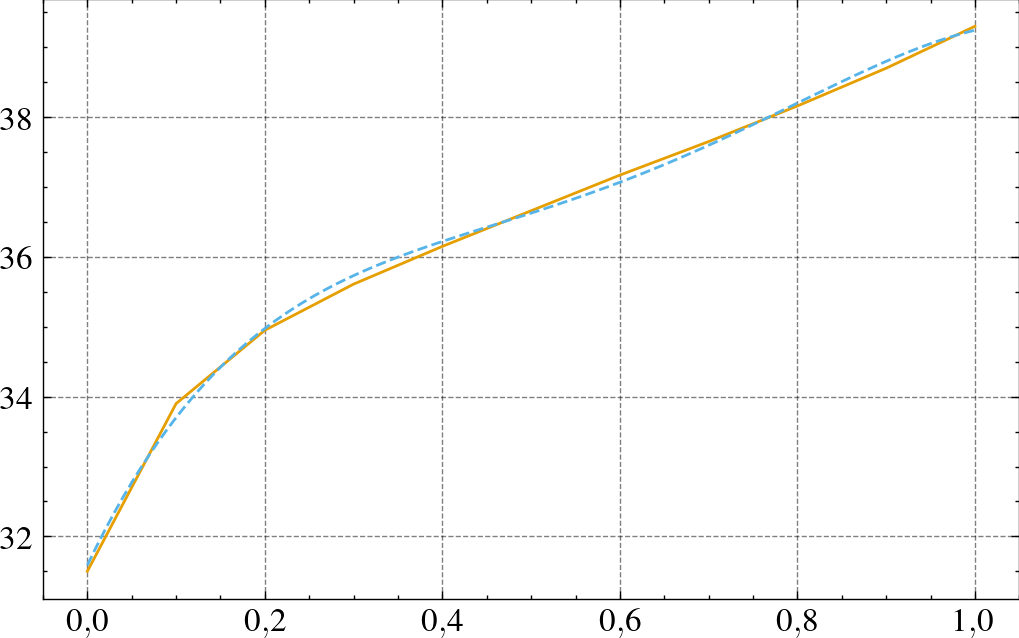

In [7]:
plt.figure()

# From: https://imgv2-2-f.scribdassets.com/img/document/682244176/original/0a169c4659/1730632177?v=1
v = np.array([13.1, 12.9, 12.72, 12.55, 12.39, 12.22, 12.05, 11.87, 11.65, 11.3, 10.5]) * 3
z = np.array([1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0])
plt.plot(z, v)

deg = 4
batt_k_V_OC_coeffs = np.polynomial.Polynomial.fit(z, v, deg, [0, 1]).convert().coef
display(batt_k_V_OC_coeffs)

v = np.linspace(0, 1, 100)
y_ref2 = np.polynomial.Polynomial(batt_k_V_OC_coeffs)(v)
plt.plot(v, y_ref2)

battery_params = {
    'batt_eta': 1,
    'batt_Q': 48 * 3600,
    'batt_R_0': 0.05,
    'batt_C_0': 48 * 3600 / 36,
    'batt_R_1': 0.01,
    'batt_C_1': 50,
    'batt_R_2': 10,
    'batt_C_2': 5000,
    'batt_k_V_OC_coeffs': batt_k_V_OC_coeffs,
}

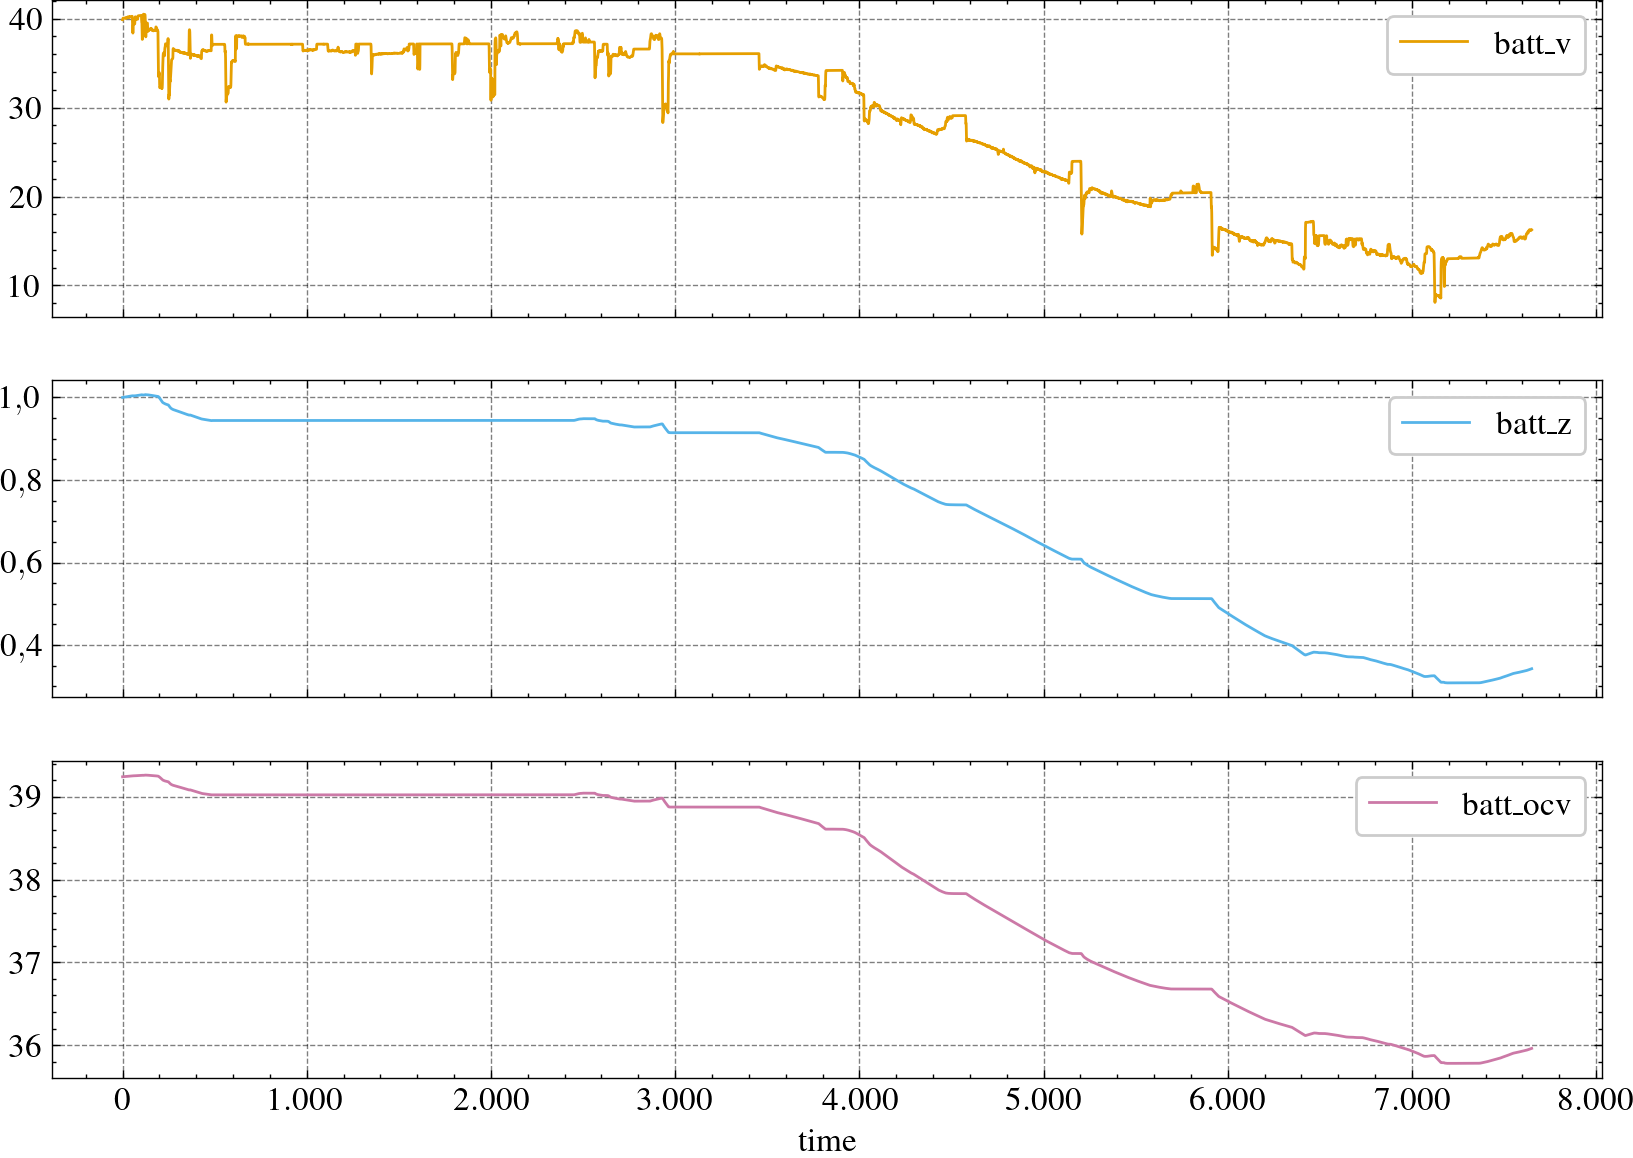

In [9]:
df = dfa.copy(deep=True)

# Time array
dT = (df.index[1] - df.index[0]).to_numpy().astype(np.float64) * 1e-9   # simulation time in seconds
lenT = len(df.index)
T = np.linspace(0, lenT * dT, lenT, endpoint=False)  # Recreate the time array because of numerical issues from the index datetime to float transformation

# Inputs
U = df[['batt_i']].to_numpy().T

# Model
battery = Battery.build(battery_params)

# Initial state
X0 = np.zeros(battery.nstates)
X0[battery.state_index['batt_z']] = 1
# X0[battery.state_index['d_batt_v_C_0']] = 36

# Simulation
res = ct.input_output_response(battery, T=T, U=U, X0=X0, solve_ivp_method='LSODA', solve_ivp_kwargs=dict(max_step=np.inf))
ydata = res.to_pandas().set_index('time')[res.output_labels]

ydata.plot(subplots=True, figsize=(10,7));

# Optimization

In [10]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from pymoo.core.problem import ElementwiseProblem
from pymoo.optimize import minimize
from pymoo.algorithms.soo.nonconvex.nelder import NelderMead
from pymoo.algorithms.soo.nonconvex.pso import PSO
from pymoo.algorithms.soo.nonconvex.isres import ISRES
from pymoo.algorithms.soo.nonconvex.es import ES
from pymoo.algorithms.soo.nonconvex.de import DE
from pymoo.algorithms.soo.nonconvex.g3pcx import G3PCX
from pymoo.algorithms.soo.nonconvex.pattern import PatternSearch
from pymoo.operators.sampling.lhs import LHS
from pymoo.termination.default import DefaultSingleObjectiveTermination
from pymoo.parallelization.starmap import StarmapParallelization
from multiprocessing.pool import ThreadPool
from multiprocessing import Pool
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import copy


class MyOptimizationProblem(ElementwiseProblem):
    def __init__(
        self,
        model_function,
        training_data,
        training_data_columns,
        model_params,
        opt_params_bounds,
        X0_dict,
        input_columns,
        data_scaler=RobustScaler,
        **kwargs
    ):
        assert all('min' in pb and 'max' in pb for pb in opt_params_bounds.values()), "All opt_params_bounds must have 'min' and 'max' keys"

        self.model_function = model_function
        self.model_params = model_params
        self.data_scaler = data_scaler
        self.training_data_columns = training_data_columns
        self.opt_param_names = list(opt_params_bounds.keys())
        self.input_columns = input_columns

        # Model Time array
        T = (training_data.index[1] - training_data.index[0]).to_numpy().astype(np.float64) * 1e-9
        lenT = len(training_data.index)
        self.T = np.linspace(0, lenT * T, lenT, endpoint=False)

        # Model Input data
        self.U = training_data[self.input_columns].copy(deep=True).to_numpy().T

        # Model Initial state
        self.X0 = np.zeros(len(X0_dict))
        for key, value in X0_dict.items():
            self.X0[battery.state_index[key]] = value

        # Store scale ground-truth data
        self.training_data = training_data[self.training_data_columns].to_numpy()
        self.data_scaler = data_scaler().fit(self.training_data)
        self.training_data = self.scale_data(self.training_data)

        super().__init__(
            n_var=len(self.opt_param_names),  # Number of parameters to optimize
            n_obj=1,  # Single objective
            n_constr=0,  # No constraints
            xl=np.array([p['min'] for p in opt_params_bounds.values()]),  # Lower bounds for parameters
            xu=np.array([p['max'] for p in opt_params_bounds.values()]),  # Upper bounds for parameters
            **kwargs,
        )

    def _evaluate(self, x, out, *args, **kwargs):
        out["F"] = self.objective_function(x, *args, **kwargs)

    def objective_function(self, x, *args, **kwargs):
        input_params = {k: x[i] for (i, k) in enumerate(self.opt_param_names)}
        model_params = self.model_params | convert_to_model_params(input_params)

        # Run the simulation
        try:
            model_predictions = self.model_function(T=self.T, U=self.U, X0=self.X0, **model_params)[self.training_data_columns].to_numpy()
        except Exception as e:
            # print(f"Error in model_function: {e}")
            return 1e9  # Penalize parameters that break the model

        # Scale model predictions
        scaled_model_predictions = self.scale_data(model_predictions)

        return mean_squared_error(self.training_data, scaled_model_predictions)

    def scale_data(self, data):
        """ Helper to scale data """
        return self.data_scaler.transform(data)

    def rescale_data(self, data):
        """ Helper rescale data """
        return self.data_scaler.inverse_transform(data)


def convert_to_model_params(input_params):
    """ Helper to convert between our input_params and the model input_params """
    if 'batt_ocv_coeff_0' not in input_params:
        return input_params

    keys = [k for k in input_params if k.startswith('batt_ocv_coeff_')]
    return input_params | {'batt_k_V_OC_coeffs': [input_params.pop(key) for key in keys]}


def model_function(T, U, X0, **params):
    return ct.input_output_response(
        Battery.build(params=params),
        T=T,
        U=U,
        X0=X0,
        solve_ivp_method='Radau',
    ).to_pandas()


def plot_optimization_params(result, params_bounds, scatter_alpha=0.5, scatter_size=5,
                              line_color='k', line_width=1.5, show=True):
    # Extract data from the result's history
    parameters = []
    generations = []
    optimal_parameters = []

    for gen_idx, entry in enumerate(result.history):
        X = entry.pop.get("X")  # Parameter values
        F = entry.pop.get("F")  # Objective values

        generations.extend([gen_idx] * len(X))  # Repeat the generation index for each individual
        parameters.extend(X)

        # Find the best parameter set in the current generation
        best_idx = np.argmin(F)
        optimal_parameters.append(X[best_idx])

    parameters = np.array(parameters)
    generations = np.array(generations)
    optimal_parameters = np.array(optimal_parameters)

    # Number of parameters
    parameters_names = list(params_bounds.keys())
    n_params = parameters.shape[1]

    # Determine subplot layout
    max_columns = 5
    n_rows = (n_params + max_columns - 1) // max_columns  # Calculate rows needed
    n_cols = min(n_params, max_columns)

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, sharey=True, figsize=(n_cols * 4, n_rows * 4))
    axes = np.array(axes).reshape(-1)  # Flatten axes for easier iteration

    for i, ax in enumerate(axes[:n_params]):
        # Scatter plot for parameter i
        ax.scatter(parameters[:, i], generations, alpha=scatter_alpha, s=scatter_size)

        # Plot optimal parameter values as a black line
        ax.plot(optimal_parameters[:, i], np.arange(len(optimal_parameters)), color=line_color, lw=line_width, label="Optimal")

        ax.set_title(parameters_names[i])
        ax.set_xlabel("Value")
        if i % n_cols == 0:
            ax.set_ylabel("Generation")  # Label only the first subplot in each row
        ax.grid(True)

    # Turn off unused subplots
    for ax in axes[n_params:]:
        ax.axis('off')

    # Adjust subplot spacing
    plt.gca().invert_yaxis()
    plt.subplots_adjust(wspace=0.3, hspace=0.4)  # Add spacing between subplots
    plt.tight_layout()

    if show:
        plt.show()

    return fig

def plot_optimization_error(result, show=True):
    n_evals = []             # corresponding number of function evaluations
    hist_F = []              # the objective space values in each generation

    for algo in result.history:
        # store the number of function evaluations
        n_evals.append(algo.evaluator.n_eval)

        # retrieve the optimum from the algorithm
        opt = algo.opt

        # filter out only the feasible and append and objective space values
        feas = np.where(opt.get("feasible"))[0]
        hist_F.append(opt.get("F")[feas])

    n_evals = np.array(n_evals).ravel()
    hist_F = np.array(hist_F).ravel()

    fig = plt.figure()

    plt.plot(n_evals, hist_F)
    plt.xlabel('Evaluations')
    plt.ylabel('MSE')
    plt.tight_layout()

    if show:
        plt.show()

    return fig

def plot_compare(df, ydata, column: str, show=True):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    ax1.plot(ydata.index, df[column], label='data')
    ax1.plot(ydata.index, ydata[column], label='model')
    ax1.set_title(f'Comparing {column}')
    ax1.legend()

    error = df[column].to_numpy() - ydata[column].to_numpy()

    ax2.plot(ydata.index, error, label='error', color='gray')

    mean_error = np.mean(error)
    rms_error = np.sqrt(np.mean(error**2))
    accumulated_error = np.sum(error)

    ax2.set_title(f'Error in {column} (Mean: {mean_error:.2f}, RMS: {rms_error:.2f}, Accumulated: {accumulated_error:.2f})')
    ax2.legend()

    plt.tight_layout()

    if show:
        plt.show()

    return fig

In [11]:
battery_params

{'batt_eta': 1,
 'batt_Q': 172800,
 'batt_R_0': 0.05,
 'batt_C_0': 4800.0,
 'batt_R_1': 0.01,
 'batt_C_1': 50,
 'batt_R_2': 10,
 'batt_C_2': 5000,
 'batt_k_V_OC_coeffs': array([ 31.58748252,  26.53158508, -60.75174825,  69.4988345 ,
        -27.62237762])}

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |      120 |  5.155227E+02 |  4.4261702347
     2 |      240 |  2.448847E+02 |  4.4261702347
     3 |      360 |  9.728651E+01 |  4.4261702347
     4 |      480 |  4.889214E+01 |  3.2229098325
     5 |      600 |  3.409745E+01 |  3.2229098325
     6 |      720 |  2.189981E+01 |  2.0483228603
     7 |      840 |  1.662326E+01 |  1.9344192210
     8 |      960 |  1.137160E+01 |  0.9525602909
     9 |     1080 |  7.9373652018 |  0.9525602909
    10 |     1200 |  6.6699846399 |  0.9525602909
    11 |     1320 |  5.5456940569 |  0.6816203625
    12 |     1440 |  4.4711038664 |  0.5237320416
    13 |     1560 |  3.7959518392 |  0.5237320416
    14 |     1680 |  3.1809574496 |  0.5237320416
    15 |     1800 |  2.7788294790 |  0.5237320416
    16 |     1920 |  2.4239632756 |  0.5237320416
    17 |     2040 |  2.0800336559 |  0.3267327156
    18 |     2160 |  1.6908422751 |  0.3267327156
    19 |     2280 |  1.4098471915 |  0.3267327156


{'batt_R_0': 0.05,
 'batt_C_0': 4800.0,
 'batt_R_1': 0.01,
 'batt_C_1': 50,
 'batt_R_2': 10,
 'batt_C_2': 5000,
 'batt_eta': 1,
 'batt_k_V_OC_coeffs': array([ 31.58748252,  26.53158508, -60.75174825,  69.4988345 ,
        -27.62237762])}

Best parameters found:


{'batt_R_0': 0.026670541246598043,
 'batt_C_0': 752681.9518171964,
 'batt_R_1': 0.028229923702159165,
 'batt_C_1': 629.4717860177785,
 'batt_R_2': 64.95405181489905,
 'batt_C_2': 996933.0598449642,
 'batt_eta': 0.9924984692977026,
 'batt_k_V_OC_coeffs': [27.12579207197056,
  21.835672395907135,
  0.5667194737013491,
  -26.978629283131838,
  17.23451821405696]}

Objective value at solution: [0.03528535]


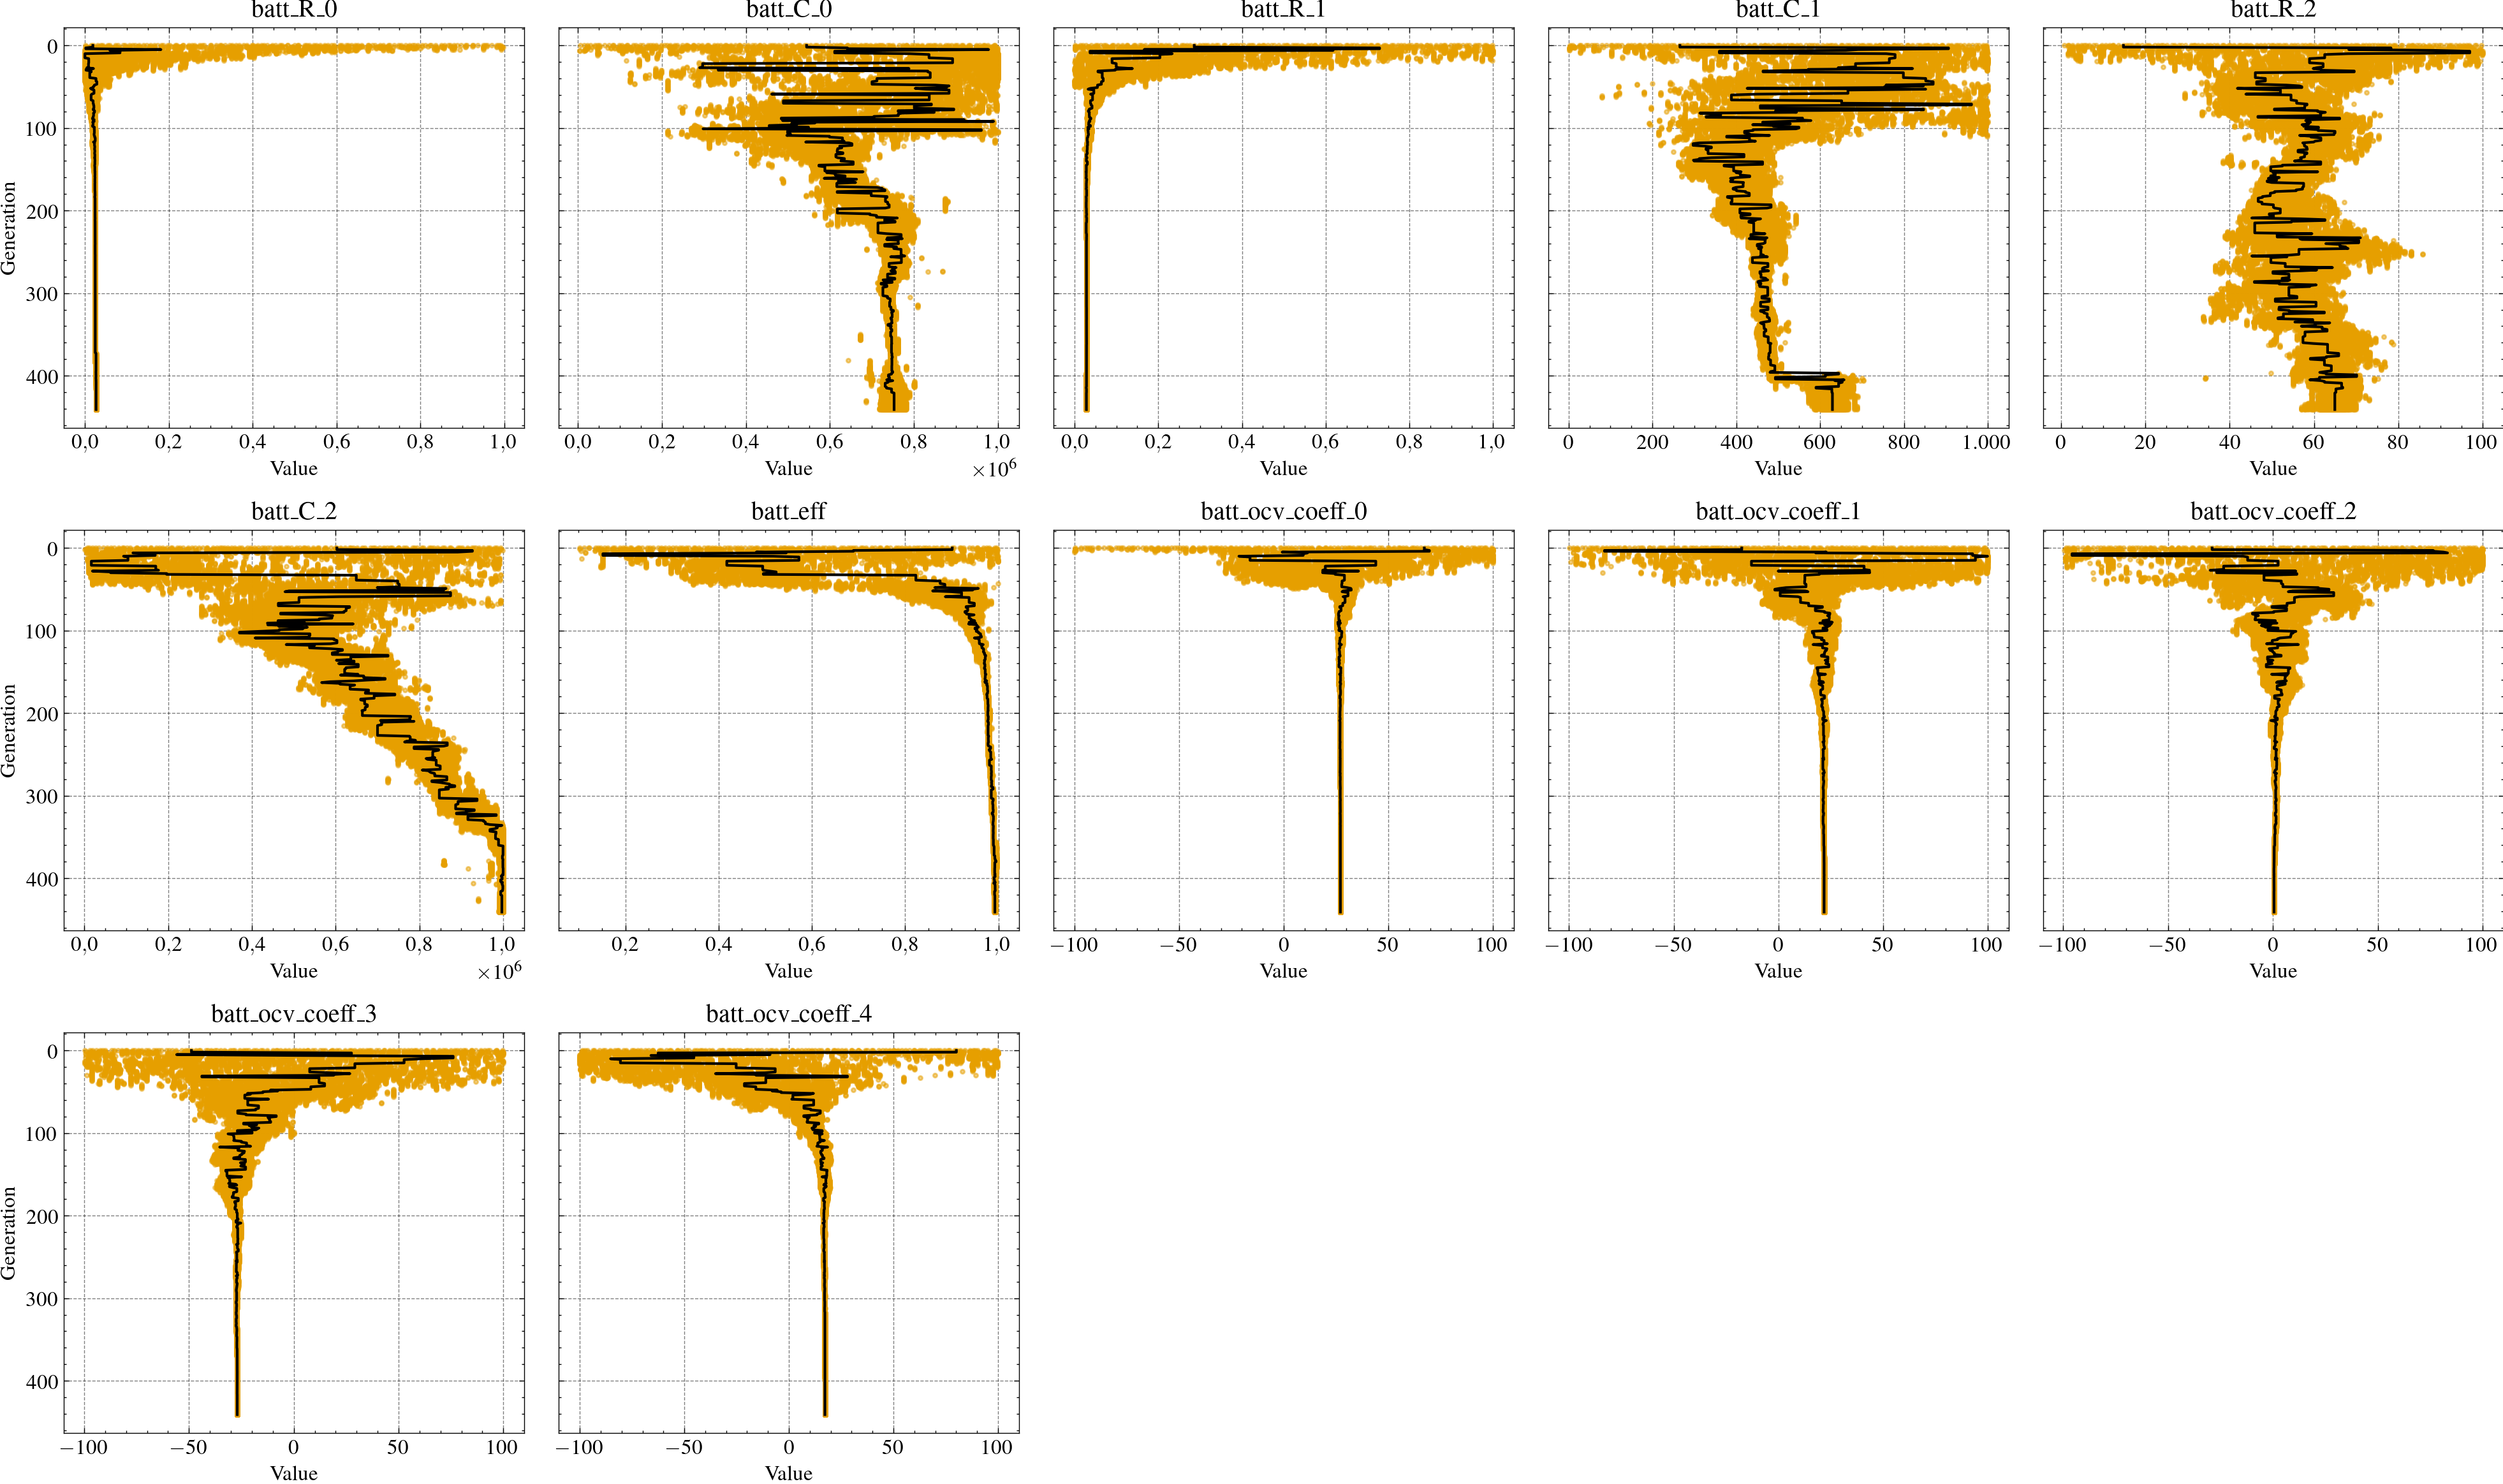

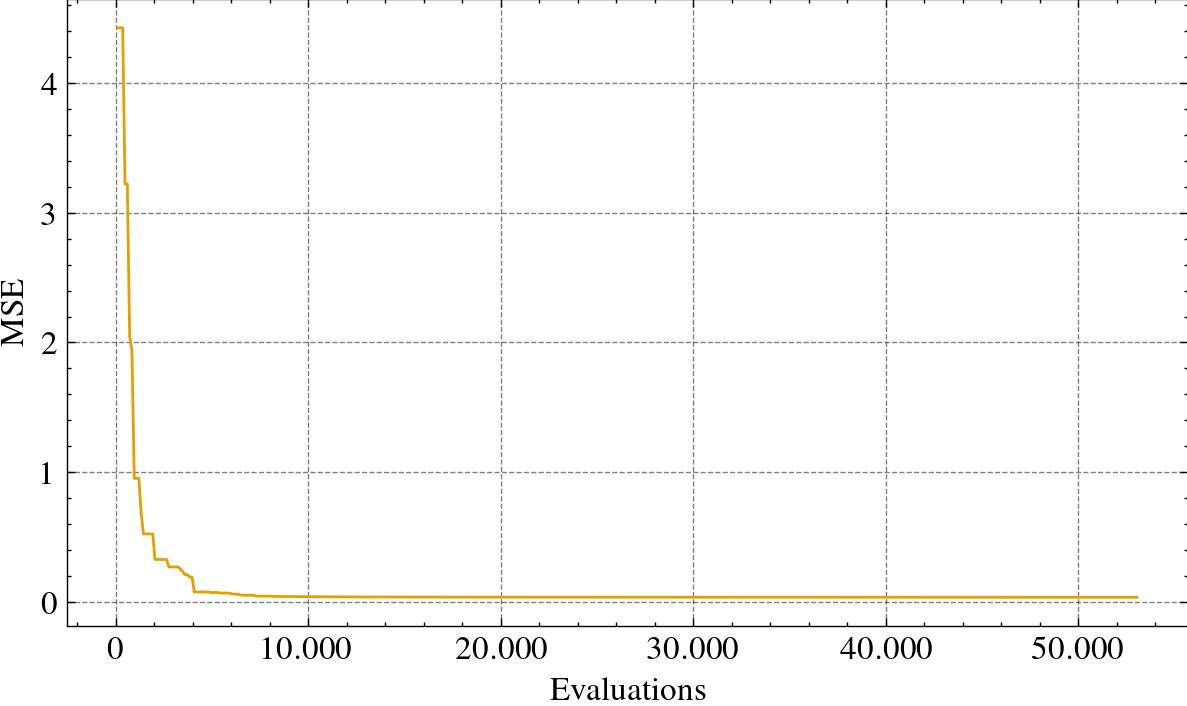

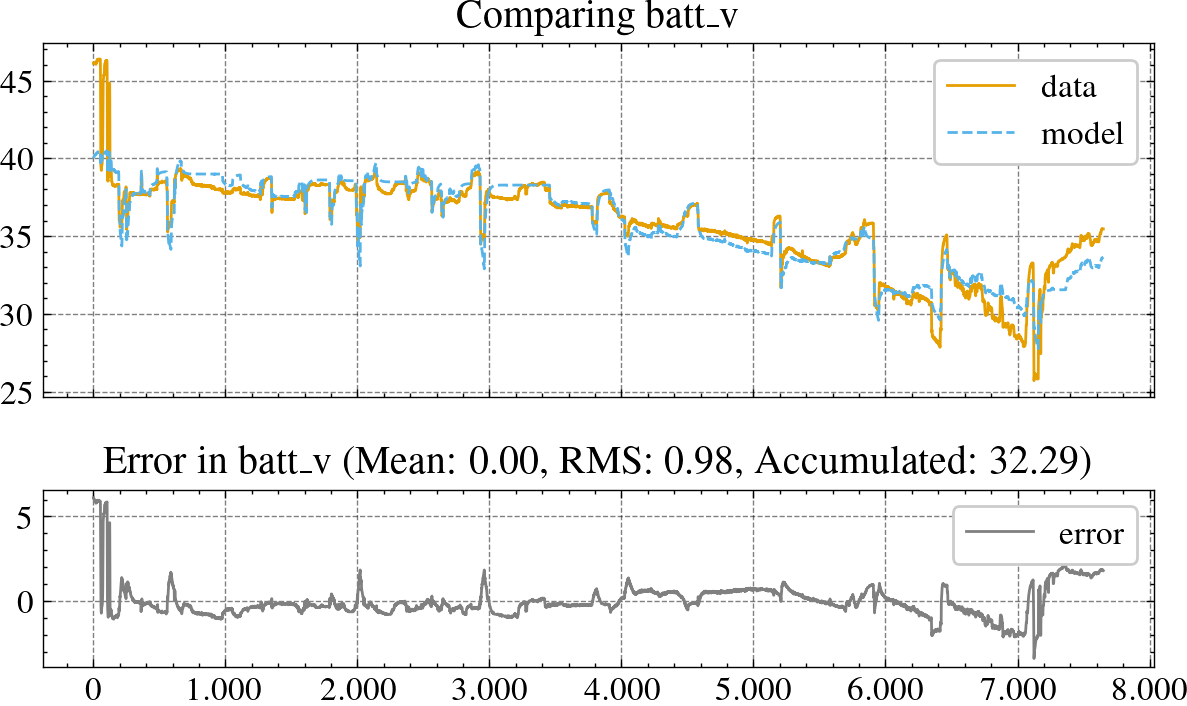

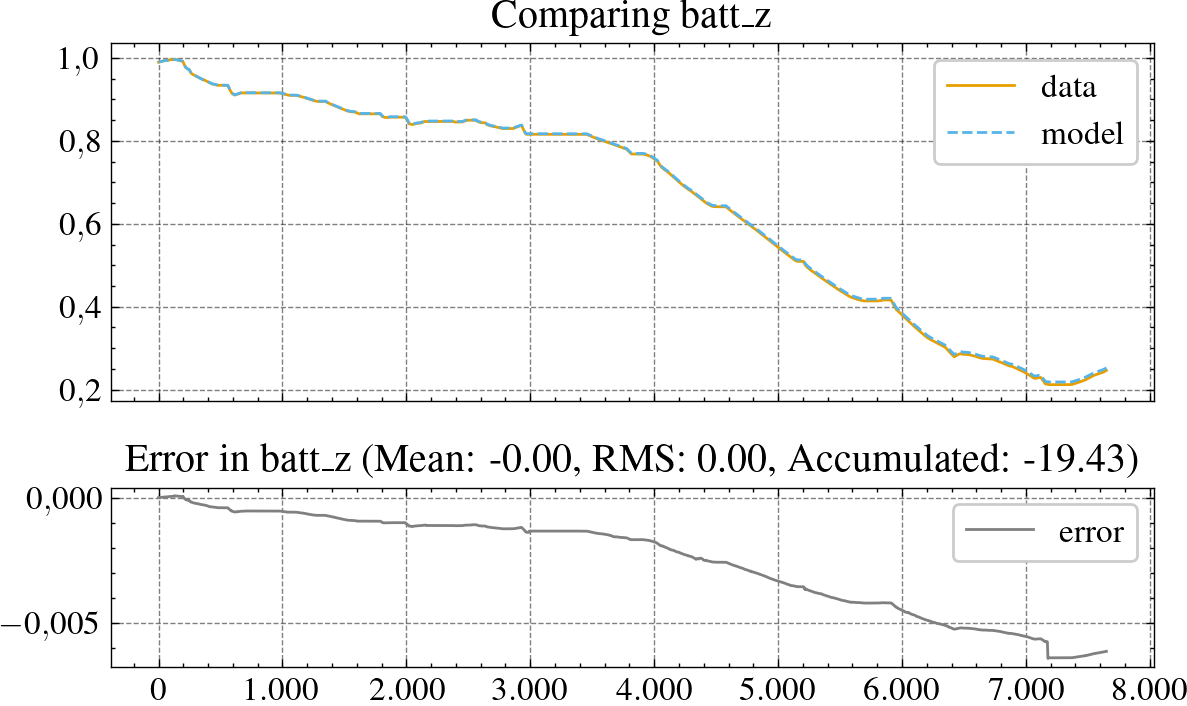

In [ ]:
## BATTERY OPTIMIZATION

import warnings
warnings.filterwarnings("ignore")

# Select the optimization data
data_cols = ['batt_v', 'batt_z']
input_cols = ['batt_i']

# Put simulation data into df
df_train = dfa.copy(deep=True)[data_cols + input_cols]

# Set model states initial conditions
X0_dict = {'batt_z': df_train['batt_z'][0]}

# Initialize Parameters
params_bounds = {
    'batt_R_0': dict(min=1e-6, max=1),
    'batt_R_1': dict(min=1e-6, max=1),
    'batt_C_1': dict(min=1, max=1e3),
    'batt_R_2': dict(min=1e-3, max=100),
    'batt_C_2': dict(min=10, max=1e6),
    'batt_eta': dict(min=0.1, max=1),
}
n_coeffs = 5
for i in range(0, n_coeffs):
    params_bounds[f'batt_ocv_coeff_{i}'] = dict(min=-100, max=100)

# Initialize the thread pool and create the runner
n_processes = 32
pool = Pool(processes=n_processes)
runner = StarmapParallelization(pool.starmap)

# Initialize the problem
problem = MyOptimizationProblem(
    model_function=model_function,
    training_data=df_train,
    training_data_columns=data_cols,
    model_params=battery_params,
    opt_params_bounds=params_bounds,
    input_initial_state=input_initial_state,
    input_columns=input_cols,
    data_scaler=RobustScaler,
    elementwise_runner=runner,
)

# algorithm = ISRES(n_offsprings=10*len(params_bounds), rule=1.0 / 7.0, gamma=0.85, alpha=0.2)
algorithm = DE(
    pop_size=10*len(params_bounds),
    sampling=LHS(),
    variant="DE/rand/1/bin",
    F=0.2,
    CR=0.9,
)

# Specify termination criteria (optional)
termination = DefaultSingleObjectiveTermination(
    xtol=1e-8,
    cvtol=1e-6,
    ftol=1e-6,
    period=20,
    n_max_gen=1000,
    n_max_evals=100000
)

# Run the optimization
result = minimize(
    problem,
    algorithm,
    termination=termination,
    seed=42,
    verbose=True,
    save_history=True,
)
print('Threads:', result.exec_time)
pool.close()
pool.join()

# Print the results
best_params = convert_to_model_params({k: result.X[i] for (i, k) in enumerate(params_bounds.keys())})
original_params = {k: convert_to_model_params(battery_params)[k] for k in best_params.keys()}
print("Original parameters were:")
display(original_params)
print("Best parameters found:")
display(best_params)
print("Objective value at solution:", result.F)

plot_optimization_params(result, params_bounds)
plot_optimization_error(result, params_bounds)

X0 = np.zeros(len(X0_dict))
for key, value in X0_dict.items():
    X0[battery.state_index[key]] = value
best_fit_data = model_function(T, U, X0, **(battery_params | best_params))

for col in data_cols:
    plot_compare(df, best_fit_data, col)

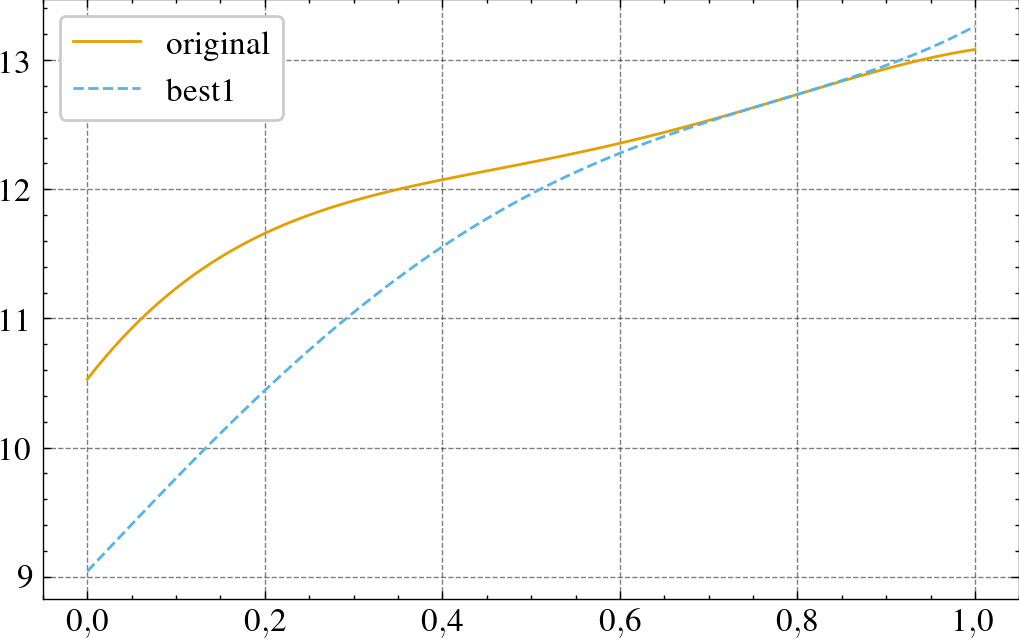

In [13]:
soc_test = np.linspace(0, 1, 101, endpoint=True)
plt.plot(soc_test, np.polynomial.Polynomial(original_params['batt_k_V_OC_coeffs'])(soc_test)/3, label='original')
plt.plot(soc_test, np.polynomial.Polynomial(best_params['batt_k_V_OC_coeffs'])(soc_test)/3, label='best1')
plt.legend()


In [14]:
print(best_params['batt_R_1']*best_params['batt_C_1'])
print(best_params['batt_R_2']*best_params['batt_C_2'])

17.769940491943746
64754841.62515566


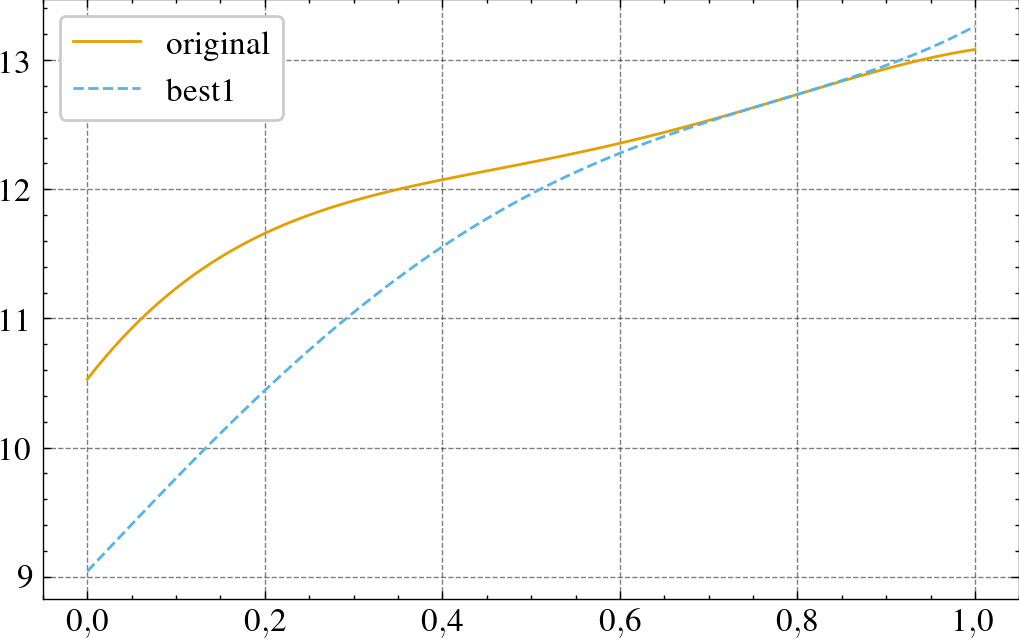

In [4]:
battery_params = {
    'batt_eta': 1,
    'batt_Q': 48 * 3600,
    'batt_R_0': 0.05,
    'batt_C_0': 48 * 3600 / 36,
    'batt_R_1': 0.01,
    'batt_C_1': 50,
    'batt_R_2': 10,
    'batt_C_2': 5000,
    'batt_k_V_OC_coeffs': np.array([ 31.58748252, 26.53158508, -60.75174825, 69.4988345, -27.62237762]),
}
best_params = {'batt_R_0': 0.026670541246598043,
 'batt_C_0': 752681.9518171964,
 'batt_R_1': 0.028229923702159165,
 'batt_C_1': 629.4717860177785,
 'batt_R_2': 64.95405181489905,
 'batt_C_2': 996933.0598449642,
 'batt_eta': 0.9924984692977026,
 'batt_k_V_OC_coeffs': [27.12579207197056,
  21.835672395907135,
  0.5667194737013491,
  -26.978629283131838,
  17.23451821405696]}

soc_test = np.linspace(0, 1, 101, endpoint=True)
plt.plot(soc_test, np.polynomial.Polynomial(battery_params['batt_k_V_OC_coeffs'])(soc_test)/3, label='original')
plt.plot(soc_test, np.polynomial.Polynomial(best_params['batt_k_V_OC_coeffs'])(soc_test)/3, label='best1')
plt.legend()
